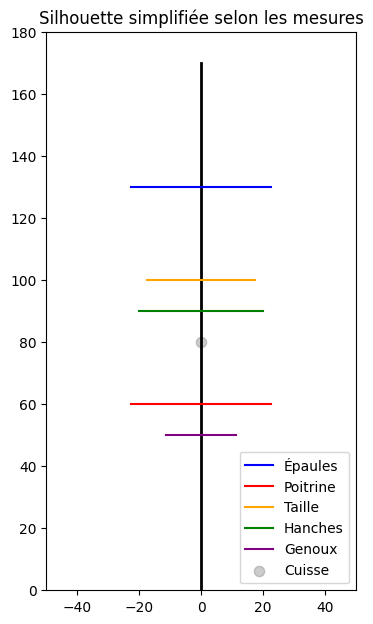

In [2]:
import matplotlib.pyplot as plt

# Exemple de mesures (remplace-les par les tiennes)
mesures = {
    'taille': 170,
    'tour_de_poitrine': 90,
    'hauteur_de_poitrine': 60,
    'hauteur_d_entrejambe': 80,
    'largeur_des_hanches': 40,
    'hauteur_des_hanches': 90,
    'hauteur_des_genoux': 50,
    'largeur_d_epaule': 45,
    'hauteur_des_epaules': 130,
    'tour_de_cuisse': 55,
    'tour_de_taille': 70,
    'hauteur_de_la_taille': 100
}

# Création d'une figure
fig, ax = plt.subplots(figsize=(4, 8))

# Dessin simplifié (vue de face)
# Tronc
ax.plot([0, 0], [0, mesures['taille']], color='black', linewidth=2)

# Épaules
epaule_g = -mesures['largeur_d_epaule']/2
epaule_d = mesures['largeur_d_epaule']/2
ax.plot([epaule_g, epaule_d], [mesures['hauteur_des_epaules']]*2, color='blue', label='Épaules')

# Poitrine
poitrine_g = -mesures['tour_de_poitrine']/4
poitrine_d = mesures['tour_de_poitrine']/4
ax.plot([poitrine_g, poitrine_d], [mesures['hauteur_de_poitrine']]*2, color='red', label='Poitrine')

# Taille
taille_g = -mesures['tour_de_taille']/4
taille_d = mesures['tour_de_taille']/4
ax.plot([taille_g, taille_d], [mesures['hauteur_de_la_taille']]*2, color='orange', label='Taille')

# Hanches
hanche_g = -mesures['largeur_des_hanches']/2
hanche_d = mesures['largeur_des_hanches']/2
ax.plot([hanche_g, hanche_d], [mesures['hauteur_des_hanches']]*2, color='green', label='Hanches')

# Genoux
ax.plot([epaule_g/2, epaule_d/2], [mesures['hauteur_des_genoux']]*2, color='purple', label='Genoux')

# Cuisses (représentées sous forme de points pour indiquer le tour)
ax.scatter(0, mesures['hauteur_d_entrejambe'], s=mesures['tour_de_cuisse'], color='gray', alpha=0.4, label='Cuisse')

# Configuration du graphique
ax.set_xlim(-50, 50)
ax.set_ylim(0, mesures['taille'] + 10)
ax.set_aspect('equal')
ax.set_title("Silhouette simplifiée selon les mesures")
# ax.invert_yaxis()
ax.legend(loc='lower right')

plt.show()

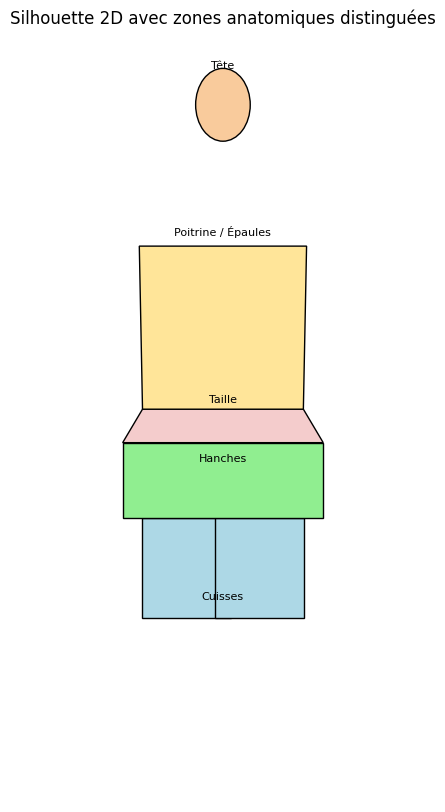

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

# --- Mesures (en cm) ---
mesures = {
    "taille":	181.5084,
     "tour_de_poitrine" :	134.1120,
"hauteur_de_poitrine"	:133.1976,
"hauteur_d_entrejambe":78.1050,
"largeur_des_hanches":55.0926,
"hauteur_des_hanches"	:98.7044,
"hauteur_des_genoux"	:50.5968,
"largeur_d_epaule"	:45.9486,
"hauteur_des_epaules"	:152.6921,
"tour_de_cuisse"	:76.9112,
"tour_de_taille"	:138.8110,
"hauteur_de_la_taille": 107.8992,
}

# --- Fonction de conversion ---
def tour_to_largeur(tour):
    return tour / math.pi

# --- Calculs de largeurs apparentes ---
largeur_poitrine = tour_to_largeur(mesures["tour_de_poitrine"])
largeur_taille = tour_to_largeur(mesures["tour_de_taille"])
largeur_cuisse = tour_to_largeur(mesures["tour_de_cuisse"])
largeur_epaule = mesures["largeur_d_epaule"]
largeur_hanche = mesures["largeur_des_hanches"]

# --- Création de la figure ---
fig, ax = plt.subplots(figsize=(4, 10))
ax.set_xlim(-30, 30)
ax.set_ylim(0, mesures["taille"] + 30)
ax.set_aspect('equal')
ax.axis('off')

# --- Couleurs pour chaque zone ---
couleurs = {
    "cuisses": "#add8e6",       # bleu clair
    "hanches": "#90ee90",       # vert clair
    "taille": "#f4cccc",        # rose clair
    "poitrine": "#ffe599",      # jaune clair
    "epaules": "#c9daf8",       # bleu pastel
    "tete": "#f9cb9c"           # chair clair
}

# --- Dessin par zone ---
# Cuisses (gauche et droite)
ecart_cuisses = 10
for signe in [-1, 1]:
    ax.add_patch(patches.Rectangle(
        (signe * ecart_cuisses - largeur_cuisse/2, mesures["hauteur_des_genoux"]),
        largeur_cuisse,
        mesures["hauteur_d_entrejambe"] - mesures["hauteur_des_genoux"],
        facecolor=couleurs["cuisses"], edgecolor='black'
    ))
ax.text(0, mesures["hauteur_des_genoux"] + 5, "Cuisses", ha='center', fontsize=8)

# Hanches
ax.add_patch(patches.Rectangle(
    (-largeur_hanche/2, mesures["hauteur_d_entrejambe"]),
    largeur_hanche,
    mesures["hauteur_des_hanches"] - mesures["hauteur_d_entrejambe"],
    facecolor=couleurs["hanches"], edgecolor='black'
))
ax.text(0, mesures["hauteur_des_hanches"] - 5, "Hanches", ha='center', fontsize=8)

# Taille (trapèze)
ax.add_patch(patches.Polygon([
    (-largeur_hanche/2, mesures["hauteur_des_hanches"]),
    (-largeur_taille/2, mesures["hauteur_de_la_taille"]),
    (largeur_taille/2, mesures["hauteur_de_la_taille"]),
    (largeur_hanche/2, mesures["hauteur_des_hanches"])
], closed=True, facecolor=couleurs["taille"], edgecolor='black'))
ax.text(0, mesures["hauteur_de_la_taille"] + 2, "Taille", ha='center', fontsize=8)

# Poitrine reliée aux épaules (trapèze élargi jusqu'à la largeur des épaules)
ax.add_patch(patches.Polygon([
    (-largeur_taille/2, mesures["hauteur_de_la_taille"]),
    (-largeur_epaule/2, mesures["hauteur_des_epaules"]),
    (largeur_epaule/2, mesures["hauteur_des_epaules"]),
    (largeur_taille/2, mesures["hauteur_de_la_taille"])
], closed=True, facecolor=couleurs["poitrine"], edgecolor='black'))
ax.text(0, mesures["hauteur_des_epaules"] + 3, "Poitrine / Épaules", ha='center', fontsize=8)



# Tête (ellipse)
ax.add_patch(patches.Ellipse(
    (0, mesures["taille"] + 10),
    width=15, height=20,
    facecolor=couleurs["tete"], edgecolor='black'
))
ax.text(0, mesures["taille"] + 20, "Tête", ha='center', fontsize=8)

# --- Affichage final ---
plt.title("Silhouette 2D avec zones anatomiques distinguées", fontsize=12)
plt.show()


C:\Users\mbouke.besse\AppData\Local\Temp\ipykernel_18592\2797601461.py:69: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k:" (-> linestyle=':'). The keyword argument will take precedence.
  ax.plot([left_shoulder[0], left_chest[0]], [left_shoulder[1], left_chest[1]], 'k:', linewidth=2, linestyle='dotted')
C:\Users\mbouke.besse\AppData\Local\Temp\ipykernel_18592\2797601461.py:70: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k:" (-> linestyle=':'). The keyword argument will take precedence.
  ax.plot([right_shoulder[0], right_chest[0]], [right_shoulder[1], right_chest[1]], 'k:', linewidth=2, linestyle='dotted')
C:\Users\mbouke.besse\AppData\Local\Temp\ipykernel_18592\2797601461.py:71: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k:" (-> linestyle=':'). The keyword argument will take precedence.
  ax.plot([left_chest[0], 

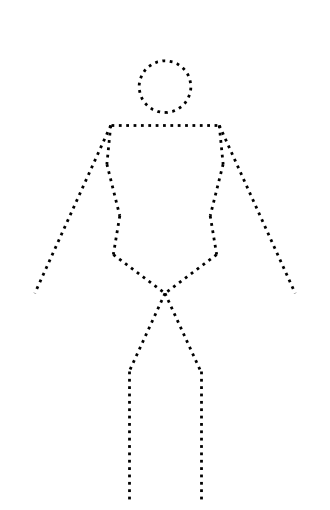

In [4]:
import matplotlib.pyplot as plt

# Exemple de mesures (en cm)
taille = 170
tour_de_poitrine = 90
hauteur_de_poitrine = 130
hauteur_d_entrejambe = 80
largeur_des_hanches = 40
hauteur_des_hanches = 95
hauteur_des_genoux = 50
largeur_d_epaule = 42
hauteur_des_epaules = 145
tour_de_cuisse = 55
tour_de_taille = 70
hauteur_de_la_taille = 110

# Conversion des tours en largeurs
largeur_poitrine = tour_de_poitrine / 2
largeur_taille = tour_de_taille / 2
largeur_cuisse = tour_de_cuisse / 2

# Points principaux
# Tête
head_center = (0, taille - 10)
head_radius = 10

# Epaules
left_shoulder = (-largeur_d_epaule/2, hauteur_des_epaules)
right_shoulder = (largeur_d_epaule/2, hauteur_des_epaules)

# Poitrine
left_chest = (-largeur_poitrine/2, hauteur_de_poitrine)
right_chest = (largeur_poitrine/2, hauteur_de_poitrine)

# Taille
left_waist = (-largeur_taille/2, hauteur_de_la_taille)
right_waist = (largeur_taille/2, hauteur_de_la_taille)

# Hanches
left_hip = (-largeur_des_hanches/2, hauteur_des_hanches)
right_hip = (largeur_des_hanches/2, hauteur_des_hanches)

# Entrejambe
crotch = (0, hauteur_d_entrejambe)

# Genoux
left_knee = (-largeur_cuisse/2, hauteur_des_genoux)
right_knee = (largeur_cuisse/2, hauteur_des_genoux)

# Pieds
left_foot = (-largeur_cuisse/2, 0)
right_foot = (largeur_cuisse/2, 0)

# Calcul de la longueur du bras (épaule -> main)
longueur_bras = hauteur_des_epaules - hauteur_d_entrejambe
# Position des mains (légèrement écartées latéralement)
main_offset_x = 0.7 * largeur_d_epaule  # facteur d'écartement latéral
left_hand = (left_shoulder[0] - main_offset_x, hauteur_des_epaules - longueur_bras)
right_hand = (right_shoulder[0] + main_offset_x, hauteur_des_epaules - longueur_bras)

fig, ax = plt.subplots(figsize=(4, 8))

# Tête
head = plt.Circle(head_center, head_radius, fill=False, linestyle='dotted', linewidth=2)
ax.add_patch(head)

# Corps (épaules -> poitrine -> taille -> hanches -> entrejambe)
ax.plot([left_shoulder[0], right_shoulder[0]], [left_shoulder[1], right_shoulder[1]], 'k:', linewidth=2)  # épaules
ax.plot([left_shoulder[0], left_chest[0]], [left_shoulder[1], left_chest[1]], 'k:', linewidth=2, linestyle='dotted')
ax.plot([right_shoulder[0], right_chest[0]], [right_shoulder[1], right_chest[1]], 'k:', linewidth=2, linestyle='dotted')
ax.plot([left_chest[0], left_waist[0]], [left_chest[1], left_waist[1]], 'k:', linewidth=2, linestyle='dotted')
ax.plot([right_chest[0], right_waist[0]], [right_chest[1], right_waist[1]], 'k:', linewidth=2, linestyle='dotted')
ax.plot([left_waist[0], left_hip[0]], [left_waist[1], left_hip[1]], 'k:', linewidth=2, linestyle='dotted')
ax.plot([right_waist[0], right_hip[0]], [right_waist[1], right_hip[1]], 'k:', linewidth=2, linestyle='dotted')
ax.plot([left_hip[0], crotch[0]], [left_hip[1], crotch[1]], 'k:', linewidth=2, linestyle='dotted')
ax.plot([right_hip[0], crotch[0]], [right_hip[1], crotch[1]], 'k:', linewidth=2, linestyle='dotted')

# Jambes
ax.plot([crotch[0], left_knee[0]], [crotch[1], left_knee[1]], 'k:', linewidth=2, linestyle='dotted')
ax.plot([crotch[0], right_knee[0]], [crotch[1], right_knee[1]], 'k:', linewidth=2, linestyle='dotted')
ax.plot([left_knee[0], left_foot[0]], [left_knee[1], left_foot[1]], 'k:', linewidth=2, linestyle='dotted')
ax.plot([right_knee[0], right_foot[0]], [right_knee[1], right_foot[1]], 'k:', linewidth=2, linestyle='dotted')

# Bras (épaules -> mains, proportionnels)
ax.plot([left_shoulder[0], left_hand[0]], [left_shoulder[1], left_hand[1]], 'k:', linewidth=2, linestyle='dotted')
ax.plot([right_shoulder[0], right_hand[0]], [right_shoulder[1], right_hand[1]], 'k:', linewidth=2, linestyle='dotted')

# Réglages
ax.set_xlim(-60, 60)
ax.set_ylim(0, taille + 20)
ax.set_aspect('equal')
ax.axis('off')

plt.show()

In [5]:
# Jeux de données morphologiques (en cm)
morphologies = [
    {
        "nom": "Homme adulte standard",
        "taille": 175,
        "tour_de_poitrine": 100,
        "hauteur_de_poitrine": 135,
        "hauteur_d_entrejambe": 82,
        "largeur_des_hanches": 40,
        "hauteur_des_hanches": 100,
        "hauteur_des_genoux": 50,
        "largeur_d_epaule": 46,
        "hauteur_des_epaules": 150,
        "tour_de_cuisse": 58,
        "tour_de_taille": 85,
        "hauteur_de_la_taille": 115
    },
    {
        "nom": "Femme adulte standard",
        "taille": 165,
        "tour_de_poitrine": 92,
        "hauteur_de_poitrine": 128,
        "hauteur_d_entrejambe": 78,
        "largeur_des_hanches": 44,
        "hauteur_des_hanches": 98,
        "hauteur_des_genoux": 48,
        "largeur_d_epaule": 40,
        "hauteur_des_epaules": 142,
        "tour_de_cuisse": 54,
        "tour_de_taille": 70,
        "hauteur_de_la_taille": 110
    },
    {
        "nom": "Adolescent",
        "taille": 155,
        "tour_de_poitrine": 80,
        "hauteur_de_poitrine": 120,
        "hauteur_d_entrejambe": 72,
        "largeur_des_hanches": 36,
        "hauteur_des_hanches": 90,
        "hauteur_des_genoux": 42,
        "largeur_d_epaule": 36,
        "hauteur_des_epaules": 130,
        "tour_de_cuisse": 48,
        "tour_de_taille": 62,
        "hauteur_de_la_taille": 100
    },
    {
        "nom": "Enfant",
        "taille": 120,
        "tour_de_poitrine": 60,
        "hauteur_de_poitrine": 90,
        "hauteur_d_entrejambe": 50,
        "largeur_des_hanches": 28,
        "hauteur_des_hanches": 65,
        "hauteur_des_genoux": 28,
        "largeur_d_epaule": 26,
        "hauteur_des_epaules": 100,
        "tour_de_cuisse": 34,
        "tour_de_taille": 50,
        "hauteur_de_la_taille": 70
    },
    {
        "nom": "Personne corpulente",
        "taille": 170,
        "tour_de_poitrine": 120,
        "hauteur_de_poitrine": 130,
        "hauteur_d_entrejambe": 80,
        "largeur_des_hanches": 54,
        "hauteur_des_hanches": 95,
        "hauteur_des_genoux": 50,
        "largeur_d_epaule": 52,
        "hauteur_des_epaules": 145,
        "tour_de_cuisse": 70,
        "tour_de_taille": 110,
        "hauteur_de_la_taille": 115
    },
    {
        "nom": "Personne très mince",
        "taille": 170,
        "tour_de_poitrine": 78,
        "hauteur_de_poitrine": 130,
        "hauteur_d_entrejambe": 80,
        "largeur_des_hanches": 32,
        "hauteur_des_hanches": 95,
        "hauteur_des_genoux": 50,
        "largeur_d_epaule": 36,
        "hauteur_des_epaules": 145,
        "tour_de_cuisse": 40,
        "tour_de_taille": 58,
        "hauteur_de_la_taille": 115
    }
]

C:\Users\mbouke.besse\AppData\Local\Temp\ipykernel_18592\2977143887.py:56: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k:" (-> linestyle=':'). The keyword argument will take precedence.
  ax.plot([left_shoulder[0], left_chest[0]], [left_shoulder[1], left_chest[1]], 'k:', linewidth=2, linestyle='dotted')
C:\Users\mbouke.besse\AppData\Local\Temp\ipykernel_18592\2977143887.py:57: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k:" (-> linestyle=':'). The keyword argument will take precedence.
  ax.plot([right_shoulder[0], right_chest[0]], [right_shoulder[1], right_chest[1]], 'k:', linewidth=2, linestyle='dotted')
C:\Users\mbouke.besse\AppData\Local\Temp\ipykernel_18592\2977143887.py:58: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k:" (-> linestyle=':'). The keyword argument will take precedence.
  ax.plot([left_chest[0], 

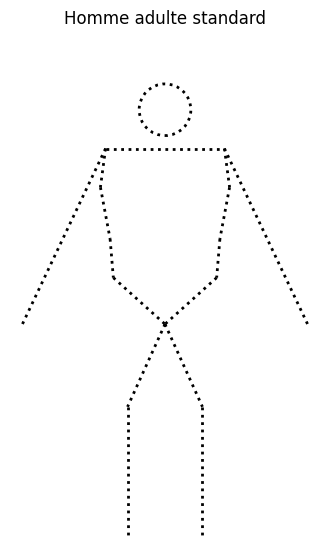

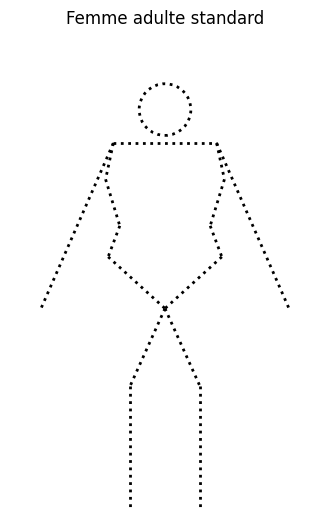

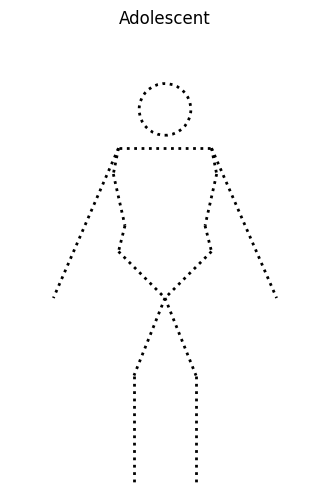

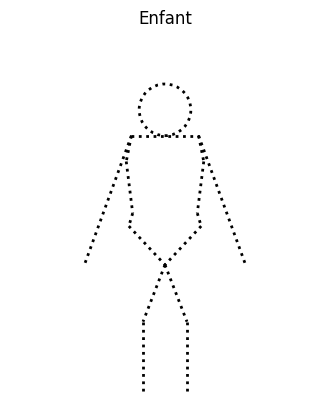

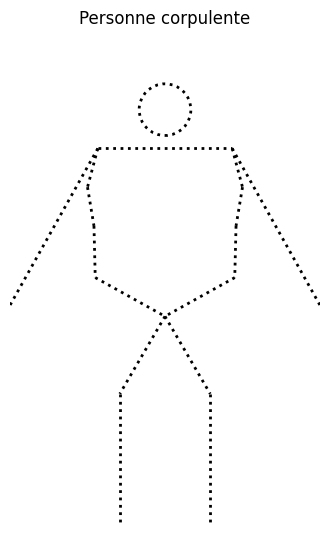

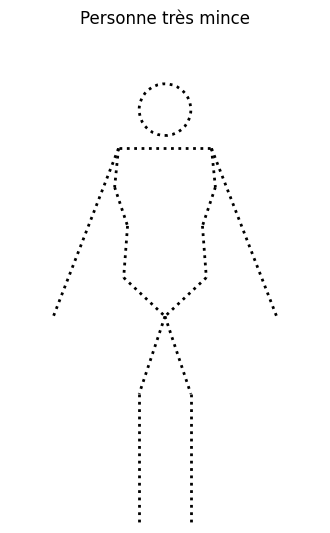

In [6]:
import matplotlib.pyplot as plt

for morpho in morphologies:
    # Récupération des mesures
    taille = morpho["taille"]
    tour_de_poitrine = morpho["tour_de_poitrine"]
    hauteur_de_poitrine = morpho["hauteur_de_poitrine"]
    hauteur_d_entrejambe = morpho["hauteur_d_entrejambe"]
    largeur_des_hanches = morpho["largeur_des_hanches"]
    hauteur_des_hanches = morpho["hauteur_des_hanches"]
    hauteur_des_genoux = morpho["hauteur_des_genoux"]
    largeur_d_epaule = morpho["largeur_d_epaule"]
    hauteur_des_epaules = morpho["hauteur_des_epaules"]
    tour_de_cuisse = morpho["tour_de_cuisse"]
    tour_de_taille = morpho["tour_de_taille"]
    hauteur_de_la_taille = morpho["hauteur_de_la_taille"]

    # Conversion des tours en largeurs
    largeur_poitrine = tour_de_poitrine / 2
    largeur_taille = tour_de_taille / 2
    largeur_cuisse = tour_de_cuisse / 2

    # Points principaux
    head_center = (0, taille - 10)
    head_radius = 10

    left_shoulder = (-largeur_d_epaule/2, hauteur_des_epaules)
    right_shoulder = (largeur_d_epaule/2, hauteur_des_epaules)
    left_chest = (-largeur_poitrine/2, hauteur_de_poitrine)
    right_chest = (largeur_poitrine/2, hauteur_de_poitrine)
    left_waist = (-largeur_taille/2, hauteur_de_la_taille)
    right_waist = (largeur_taille/2, hauteur_de_la_taille)
    left_hip = (-largeur_des_hanches/2, hauteur_des_hanches)
    right_hip = (largeur_des_hanches/2, hauteur_des_hanches)
    crotch = (0, hauteur_d_entrejambe)
    left_knee = (-largeur_cuisse/2, hauteur_des_genoux)
    right_knee = (largeur_cuisse/2, hauteur_des_genoux)
    left_foot = (-largeur_cuisse/2, 0)
    right_foot = (largeur_cuisse/2, 0)

    # Calcul de la longueur du bras (épaule -> main)
    longueur_bras = hauteur_des_epaules - hauteur_d_entrejambe
    main_offset_x = 0.7 * largeur_d_epaule
    left_hand = (left_shoulder[0] - main_offset_x, hauteur_des_epaules - longueur_bras)
    right_hand = (right_shoulder[0] + main_offset_x, hauteur_des_epaules - longueur_bras)

    fig, ax = plt.subplots(figsize=(4, 8))
    plt.title(morpho["nom"])

    # Tête
    head = plt.Circle(head_center, head_radius, fill=False, linestyle='dotted', linewidth=2)
    ax.add_patch(head)

    # Corps
    ax.plot([left_shoulder[0], right_shoulder[0]], [left_shoulder[1], right_shoulder[1]], 'k:', linewidth=2)
    ax.plot([left_shoulder[0], left_chest[0]], [left_shoulder[1], left_chest[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([right_shoulder[0], right_chest[0]], [right_shoulder[1], right_chest[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([left_chest[0], left_waist[0]], [left_chest[1], left_waist[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([right_chest[0], right_waist[0]], [right_chest[1], right_waist[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([left_waist[0], left_hip[0]], [left_waist[1], left_hip[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([right_waist[0], right_hip[0]], [right_waist[1], right_hip[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([left_hip[0], crotch[0]], [left_hip[1], crotch[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([right_hip[0], crotch[0]], [right_hip[1], crotch[1]], 'k:', linewidth=2, linestyle='dotted')

    # Jambes
    ax.plot([crotch[0], left_knee[0]], [crotch[1], left_knee[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([crotch[0], right_knee[0]], [crotch[1], right_knee[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([left_knee[0], left_foot[0]], [left_knee[1], left_foot[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([right_knee[0], right_foot[0]], [right_knee[1], right_foot[1]], 'k:', linewidth=2, linestyle='dotted')

    # Bras
    ax.plot([left_shoulder[0], left_hand[0]], [left_shoulder[1], left_hand[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([right_shoulder[0], right_hand[0]], [right_shoulder[1], right_hand[1]], 'k:', linewidth=2, linestyle='dotted')

    ax.set_xlim(-60, 60)
    ax.set_ylim(0, taille + 20)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

C:\Users\mbouke.besse\AppData\Local\Temp\ipykernel_18592\900460011.py:80: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k:" (-> linestyle=':'). The keyword argument will take precedence.
  ax.plot([neck_top[0], neck_bottom[0]], [neck_top[1], neck_bottom[1]], 'k:', linewidth=2, linestyle='dotted')
C:\Users\mbouke.besse\AppData\Local\Temp\ipykernel_18592\900460011.py:83: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k:" (-> linestyle=':'). The keyword argument will take precedence.
  ax.plot([left_shoulder[0], left_chest[0], left_waist[0], left_hip[0], crotch[0]],
C:\Users\mbouke.besse\AppData\Local\Temp\ipykernel_18592\900460011.py:86: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k:" (-> linestyle=':'). The keyword argument will take precedence.
  ax.plot([right_shoulder[0], right_chest[0], right_waist[0], right_hip[0], 

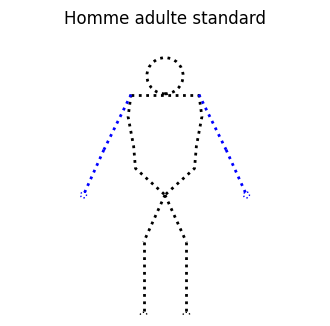

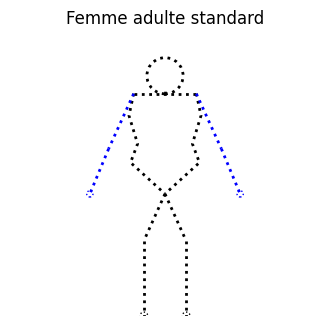

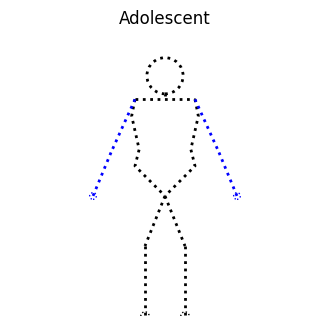

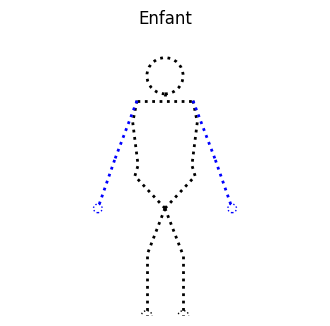

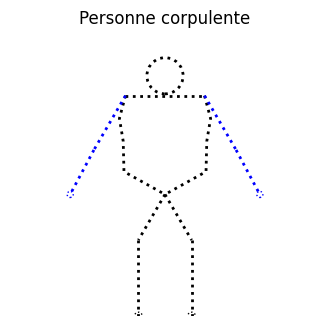

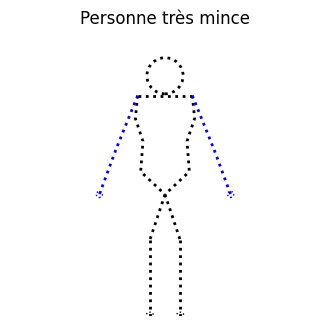

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def dessiner_silhouette(morpho):
    # Récupération des mesures
    taille = morpho["taille"]
    tour_de_poitrine = morpho["tour_de_poitrine"]
    hauteur_de_poitrine = morpho["hauteur_de_poitrine"]
    hauteur_d_entrejambe = morpho["hauteur_d_entrejambe"]
    largeur_des_hanches = morpho["largeur_des_hanches"]
    hauteur_des_hanches = morpho["hauteur_des_hanches"]
    hauteur_des_genoux = morpho["hauteur_des_genoux"]
    largeur_d_epaule = morpho["largeur_d_epaule"]
    hauteur_des_epaules = morpho["hauteur_des_epaules"]
    tour_de_cuisse = morpho["tour_de_cuisse"]
    tour_de_taille = morpho["tour_de_taille"]
    hauteur_de_la_taille = morpho["hauteur_de_la_taille"]

    # Conversion des tours en largeurs
    largeur_poitrine = tour_de_poitrine / 2
    largeur_taille = tour_de_taille / 2
    largeur_cuisse = tour_de_cuisse / 2

    # Tête
    head_radius = 0.07 * taille
    head_center = (0, taille - head_radius)

    # Cou
    neck_top = (0, taille - 2*head_radius)
    neck_bottom = (0, hauteur_des_epaules + 2)

    # Epaules
    left_shoulder = (-largeur_d_epaule/2, hauteur_des_epaules)
    right_shoulder = (largeur_d_epaule/2, hauteur_des_epaules)

    # Poitrine
    left_chest = (-largeur_poitrine/2, hauteur_de_poitrine)
    right_chest = (largeur_poitrine/2, hauteur_de_poitrine)

    # Taille
    left_waist = (-largeur_taille/2, hauteur_de_la_taille)
    right_waist = (largeur_taille/2, hauteur_de_la_taille)

    # Hanches
    left_hip = (-largeur_des_hanches/2, hauteur_des_hanches)
    right_hip = (largeur_des_hanches/2, hauteur_des_hanches)

    # Entrejambe
    crotch = (0, hauteur_d_entrejambe)

    # Genoux
    left_knee = (-largeur_cuisse/2, hauteur_des_genoux)
    right_knee = (largeur_cuisse/2, hauteur_des_genoux)

    # Pieds
    left_foot = (left_knee[0], 0)
    right_foot = (right_knee[0], 0)

    # Bras (avec coudes)
    longueur_bras = hauteur_des_epaules - hauteur_d_entrejambe
    coude_y = hauteur_des_epaules - longueur_bras * 0.55
    main_y = hauteur_des_epaules - longueur_bras
    coude_x = left_shoulder[0] - 0.4 * largeur_d_epaule
    main_x = left_shoulder[0] - 0.7 * largeur_d_epaule
    left_elbow = (coude_x, coude_y)
    left_hand = (main_x, main_y)
    coude_x = right_shoulder[0] + 0.4 * largeur_d_epaule
    main_x = right_shoulder[0] + 0.7 * largeur_d_epaule
    right_elbow = (coude_x, coude_y)
    right_hand = (main_x, main_y)

    fig, ax = plt.subplots(figsize=(4, 8))
    plt.title(morpho["nom"])

    # Tête
    head = plt.Circle(head_center, head_radius, fill=False, linestyle='dotted', linewidth=2)
    ax.add_patch(head)

    # Cou
    ax.plot([neck_top[0], neck_bottom[0]], [neck_top[1], neck_bottom[1]], 'k:', linewidth=2, linestyle='dotted')

    # Buste (courbes lissées)
    ax.plot([left_shoulder[0], left_chest[0], left_waist[0], left_hip[0], crotch[0]],
            [left_shoulder[1], left_chest[1], left_waist[1], left_hip[1], crotch[1]],
            'k:', linewidth=2, linestyle='dotted')
    ax.plot([right_shoulder[0], right_chest[0], right_waist[0], right_hip[0], crotch[0]],
            [right_shoulder[1], right_chest[1], right_waist[1], right_hip[1], crotch[1]],
            'k:', linewidth=2, linestyle='dotted')

    # Epaules
    ax.plot([left_shoulder[0], right_shoulder[0]], [left_shoulder[1], right_shoulder[1]], 'k:', linewidth=2)

    # Jambes (avec genoux)
    ax.plot([crotch[0], left_knee[0]], [crotch[1], left_knee[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([left_knee[0], left_foot[0]], [left_knee[1], left_foot[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([crotch[0], right_knee[0]], [crotch[1], right_knee[1]], 'k:', linewidth=2, linestyle='dotted')
    ax.plot([right_knee[0], right_foot[0]], [right_knee[1], right_foot[1]], 'k:', linewidth=2, linestyle='dotted')

    # Pieds
    ax.add_patch(plt.Circle(left_foot, 2.5, fill=False, linestyle='dotted', linewidth=1))
    ax.add_patch(plt.Circle(right_foot, 2.5, fill=False, linestyle='dotted', linewidth=1))

    # Bras (avec coudes)
    ax.plot([left_shoulder[0], left_elbow[0]], [left_shoulder[1], left_elbow[1]], 'b:', linewidth=2)
    ax.plot([left_elbow[0], left_hand[0]], [left_elbow[1], left_hand[1]], 'b:', linewidth=2)
    ax.plot([right_shoulder[0], right_elbow[0]], [right_shoulder[1], right_elbow[1]], 'b:', linewidth=2)
    ax.plot([right_elbow[0], right_hand[0]], [right_elbow[1], right_hand[1]], 'b:', linewidth=2)

    # Mains
    ax.add_patch(plt.Circle(left_hand, 2, fill=False, linestyle='dotted', linewidth=1, color='b'))
    ax.add_patch(plt.Circle(right_hand, 2, fill=False, linestyle='dotted', linewidth=1, color='b'))

    ax.set_xlim(-0.6*taille, 0.6*taille)
    ax.set_ylim(0, taille + 0.1*taille)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

for morpho in morphologies:
    dessiner_silhouette(morpho)

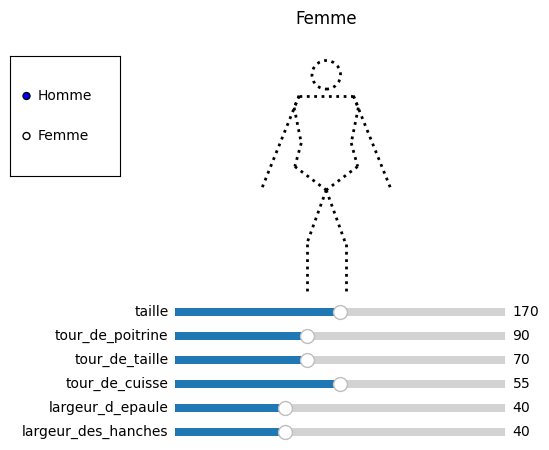

In [9]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RadioButtons

# Morphologies types
morpho_homme = {
    "nom": "Homme",
    "taille": 175,
    "tour_de_poitrine": 100,
    "tour_de_taille": 85,
    "tour_de_cuisse": 60,
    "largeur_d_epaule": 45,
    "largeur_des_hanches": 38
}

morpho_femme = {
    "nom": "Femme",
    "taille": 165,
    "tour_de_poitrine": 90,
    "tour_de_taille": 70,
    "tour_de_cuisse": 55,
    "largeur_d_epaule": 38,
    "largeur_des_hanches": 44
}

# Tu peux ajouter plus de valeurs si tu veux personnaliser les hauteurs aussi.

# Figure
fig, ax = plt.subplots(figsize=(5.5, 8))
plt.subplots_adjust(left=0.35, bottom=0.55)

# Ajout bouton radio
ax_radio = plt.axes([0.05, 0.7, 0.2, 0.15])
radio = RadioButtons(ax_radio, ('Homme', 'Femme'))

# Définition des sliders comme avant
slider_defs = {
    "taille": (140, 200, 170),
    "tour_de_poitrine": (70, 120, 90),
    "tour_de_taille": (50, 100, 70),
    "tour_de_cuisse": (40, 70, 55),
    "largeur_d_epaule": (30, 60, 40),
    "largeur_des_hanches": (30, 60, 40),
    # Tu peux ajouter ici les hauteurs personnalisables si tu veux les garder
}

sliders = {}
for i, (name, (vmin, vmax, valinit)) in enumerate(slider_defs.items()):
    ax_slider = plt.axes([0.35, 0.52 - i*0.03, 0.6, 0.02])
    sliders[name] = Slider(ax_slider, name, vmin, vmax, valinit=valinit)

def dessiner_silhouette(morpho):
    ax.clear()
    taille = morpho["taille"]
    tour_de_poitrine = morpho["tour_de_poitrine"]
    tour_de_taille = morpho["tour_de_taille"]
    tour_de_cuisse = morpho["tour_de_cuisse"]
    largeur_d_epaule = morpho["largeur_d_epaule"]
    largeur_des_hanches = morpho["largeur_des_hanches"]
    # Hauteurs proportionnelles
    taille = morpho["taille"]
    hauteur_des_epaules = 0.85 * taille
    hauteur_de_poitrine = 0.80 * taille
    hauteur_de_la_taille = 0.65 * taille
    hauteur_des_hanches = 0.55 * taille
    hauteur_d_entrejambe = 0.45 * taille
    hauteur_des_genoux = 0.22 * taille

    largeur_poitrine = tour_de_poitrine / 2
    largeur_taille = tour_de_taille / 2
    largeur_cuisse = tour_de_cuisse / 2

    head_center = (0, taille - 10)
    head_radius = 10

    left_shoulder = (-largeur_d_epaule/2, hauteur_des_epaules)
    right_shoulder = (largeur_d_epaule/2, hauteur_des_epaules)
    left_chest = (-largeur_poitrine/2, hauteur_de_poitrine)
    right_chest = (largeur_poitrine/2, hauteur_de_poitrine)
    left_waist = (-largeur_taille/2, hauteur_de_la_taille)
    right_waist = (largeur_taille/2, hauteur_de_la_taille)
    left_hip = (-largeur_des_hanches/2, hauteur_des_hanches)
    right_hip = (largeur_des_hanches/2, hauteur_des_hanches)
    crotch = (0, hauteur_d_entrejambe)
    left_knee = (-largeur_cuisse/2, hauteur_des_genoux)
    right_knee = (largeur_cuisse/2, hauteur_des_genoux)
    left_foot = (-largeur_cuisse/2, 0)
    right_foot = (largeur_cuisse/2, 0)

    longueur_bras = hauteur_des_epaules - hauteur_d_entrejambe
    main_offset_x = 0.7 * largeur_d_epaule
    left_hand = (left_shoulder[0] - main_offset_x, hauteur_des_epaules - longueur_bras)
    right_hand = (right_shoulder[0] + main_offset_x, hauteur_des_epaules - longueur_bras)

    ax.set_title(morpho["nom"])
    head = plt.Circle(head_center, head_radius, fill=False, linestyle='dotted', linewidth=2)
    ax.add_patch(head)

    def line(p1, p2):
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k:', linewidth=2)

    line(left_shoulder, right_shoulder)
    line(left_shoulder, left_chest)
    line(right_shoulder, right_chest)
    line(left_chest, left_waist)
    line(right_chest, right_waist)
    line(left_waist, left_hip)
    line(right_waist, right_hip)
    line(left_hip, crotch)
    line(right_hip, crotch)
    line(crotch, left_knee)
    line(crotch, right_knee)
    line(left_knee, left_foot)
    line(right_knee, right_foot)
    line(left_shoulder, left_hand)
    line(right_shoulder, right_hand)

    ax.set_xlim(-60, 60)
    ax.set_ylim(0, taille + 20)
    ax.set_aspect('equal')
    ax.axis('off')
    fig.canvas.draw_idle()

def update(val=None):
    morpho = {name: sliders[name].val for name in sliders}
    morpho["nom"] = selected_gender[0]
    dessiner_silhouette(morpho)

# Pour mémoriser le sexe sélectionné
selected_gender = ["Individu"]

# Callback des boutons radio
def gender_selected(label):
    selected_gender[0] = label
    if label == "Homme":
        data = morpho_homme
    else:
        data = morpho_femme
    # Mise à jour des sliders
    for key in data:
        if key in sliders:
            sliders[key].set_val(data[key])
    update()

radio.on_clicked(gender_selected)

# Connexion sliders
for slider in sliders.values():
    slider.on_changed(update)

# Initialisation
dessiner_silhouette(morpho_femme)
plt.show()
